# Using R
## Basics of the R Programming Language

* Using R as a calculator
* Programming, Interpreter & Compiler
* Variables, Assignment
* Data types - char, int, float, boolean, vector, matrix, data frame
* Input and output - use preloaded HDI data set (hdi2017_2.csv)
* Programming - sequential execution; program memory; conditionals (if); loops
* Functions

## Example usage of R using the HDI data set

* Data frame summary
* Distribution of Life Expectancy
* Defining 4 categories
    * Very High Development      HDI >= 0.8
    * High Development    0.7 <= HDI < 0.8
    * Medium Development  0.6 <= HDI < 0.7
    * Low Development            HDI < 0.6
* Average & Standard Deviation of HDI for the 4 groups
* Distribution of per capita income in the 4 groups
* Correlation of Life expectancy and per capita income
* Which countries have HDI between India's HDI $\pm$ 0.05

# Using R
## Monte Carlo Simulation of $\pi$
---

$\pi$ is the ratio of the circumference of any circle and its diameter $=\dfrac{2 \pi r}{2r}$.

Consider a square of side 2 units with a unit radius circle inscribed in it. 

Consider random points spattered in the square. The proportion of points that lie inside the inscribed circle is $\dfrac{\pi}{4}$.

In [1]:
library(ggplot2)
options(repr.plot.width=5, repr.plot.height=3)

In [2]:
plot_stuff <- function(ntrials) {
    x <- c()
    y <- c()
    pt_type <- c()
    for (tr in 1:ntrials) {
        x <- c(x, runif(1,-1,1))
        y <- c(y, runif(1,-1,1))
        if (x[tr]^2 + y[tr]^2 < 1)
            pt_type <- c(pt_type, "inside")
        else
            pt_type <- c(pt_type, "outside")
    }

    df <- data.frame(x=x, y=y, pt_type=pt_type)
    qplot(x, y, data=df, color=pt_type, xlab="x", ylab="y", size=I(0.1), asp=1)
}

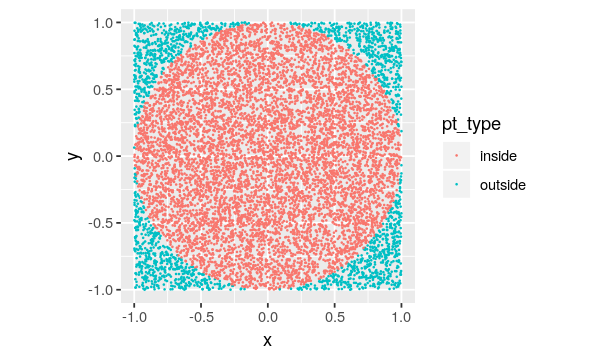

In [3]:
plot_stuff(10000)

In [4]:
loopPI <- function(ntrials) {
    count <- 0
    for (tr in 1:ntrials) {
      x <- runif(2,-1,1)
      if (x[1]^2 + x[2]^2 < 1)
        count <- count +1
    }
    piCalc <- 4*count/ntrials
    return(piCalc)
}

In [5]:
loopPI(10000)

[1] 3.1144

In [6]:
simplePI <- function(ntrials) {
    x <- runif(ntrials,-1,1)
    y <- runif(ntrials,-1,1)
    z <- x^2+y^2
    length(z[z<1])*4/ntrials
}

In [7]:
simplePI(10000)

[1] 3.144

In [8]:
tlp <- system.time(loopPI(1000000))
tlp

   user  system elapsed 
  2.140   0.000   2.143 

In [9]:
tsp <- system.time(simplePI(1000000))
tsp

   user  system elapsed 
  0.088   0.012   0.100 

In [10]:
ntrials <- 10^seq(3,6,0.05)
pis <- sapply(ntrials, simplePI)

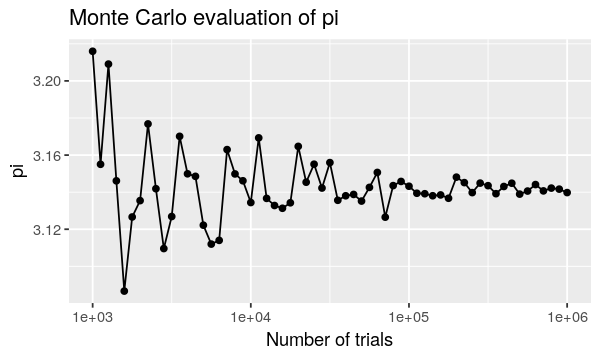

In [11]:
qplot(ntrials, pis, xlab="Number of trials", ylab="pi", main="Monte Carlo evaluation of pi", log="x", geom=c("point", "line"))

In [12]:
time_loop_pi <- c()
time_simp_pi <- c()
for (i in ntrials) {
    time_loop_pi <- c(time_loop_pi, system.time(loopPI(i))[[1]])
    time_simp_pi <- c(time_simp_pi, system.time(simplePI(i))[[1]])
}

In [13]:
time_loop_pi_try <- sapply(ntrials, function(n) { return(system.time(loopPI(n))[[1]]) })

In [16]:
time_consolidated <- data.frame(trials=ntrials, time=c(time_loop_pi, time_simp_pi), Method=c(rep("Loop", length(time_loop_pi)), rep("Simple", length(time_simp_pi))))
dim(time_consolidated); head(time_consolidated)

[1] 122   3

trials,time,Method
1000.000,0.004,Loop
1122.018,0.004,Loop
1258.925,0.004,Loop
1412.538,0.004,Loop
1584.893,0.004,Loop
1778.279,0.004,Loop


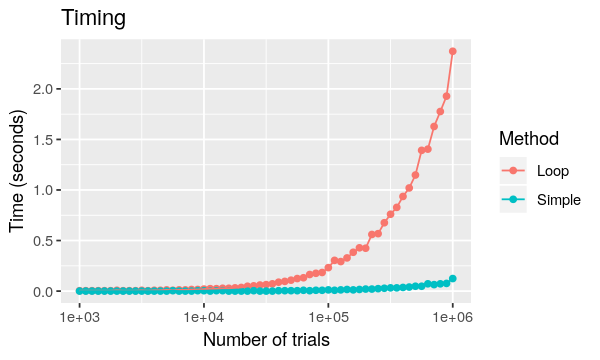

In [17]:
qplot(trials, time, data=time_consolidated, xlab="Number of trials", ylab="Time (seconds)", main="Timing", geom=c("point", "line"), log="x", color=Method)

## Exercise
* Simulate 10000 trials of a fair coin toss.
* What is the proportion of _heads_? 
* What is the longest run of Heads? 
* What is the longest run of Tails?
* Repeat the exercise with the p(H) = 0.65
---

## Sampling Distribution & Confidence limits of sample mean
---

Let $X \sim\text{N}(\mu,\sigma)$ then for samples of size $n$, \begin{equation}\bar{X}\sim\text{N}\left(\mu,\frac{\sigma}{\sqrt{n}}\right)\end{equation}

Let us generate 10,000 points from a Normal distribution with $\mu=50$ and $\sigma=25$

In [18]:
m <- 50
s <- 25
x <- rnorm(10000,m,s)

We now plot a histogram of these _Normal(50,25)_ variables.

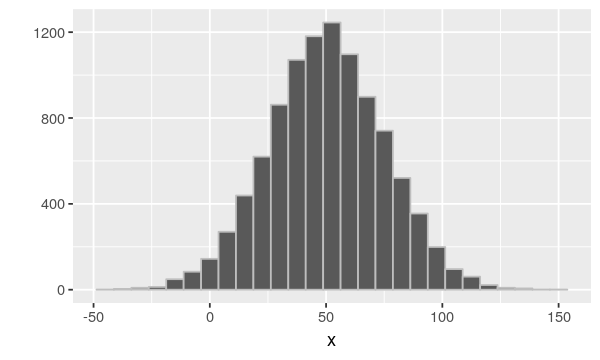

In [19]:
qplot(x, geom="histogram", binwidth=7.5, color=I("gray"))

We now generate 20,000 samples each of size $n=256$ from the same normal distribution with $\mu=50$and $\sigma=25$.

We examine the distribution of the 20,000 sample means.

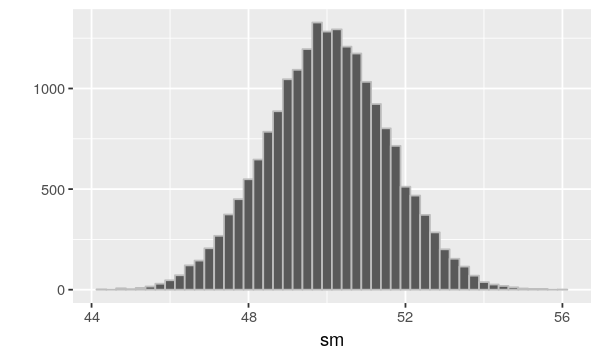

In [20]:
n=256
sm <- c()
for (i in 1:20000) {
    x <- rnorm(n,m,s)
    sm <- c(sm, mean(x))
}
qplot(sm, geom="histogram", binwidth=.25, color=I("gray"))

We see that the distribution of sample means ranges approximatey from 46 to 54, where the population variate ranges from 0 to 100, roughly. 

Summary statistics of the distributions of the original variable and the sample means follow. 

In [21]:
l1 <- c(round(summary(x),2),"Standard Dev"=round(sd(x),2))
l2 <- c(round(summary(sm),2),"Standard Dev"=round(sd(sm),2))
cbind("N(50,25)"=l1, "Sample Means"=l2)

,"N(50,25)",Sample Means
Min.,-16.34,44.18
1st Qu.,35.68,48.97
Median,50.55,50.02
Mean,52.25,50.01
3rd Qu.,66.71,51.06
Max.,124.27,56.11
Standard Dev,23.50,1.55


Recall that 

$X \sim\text{N}(\mu=50,\sigma=25)$ then for samples of size $n=256$, \begin{equation}\bar{X}\sim\text{N}\left(\mu=50,\frac{\sigma=25}{\sqrt{256}}\right) = N(50,1.56)\end{equation}

For a variable X ~ N(50,25) the 90% Confidence Interval is given by

($\mu-1.645\sigma$, $\mu+1.645\sigma$)

In [22]:
l<-m-1.645*s
u<-m+1.645*s
cat(paste("(",l,",",u,")",sep=""))

(8.875,91.125)

## CI verification for varying sample size

We next examine the percentage of sample means that fall in the 90% CI for 1000 trials each for sample sizes 20, 50, 100, 1000, 10000. We aso see the lengths of the resepective CIs, noting that as te sample size increases, the length of the CI decreases - _in other words, the confidence increases._

In [23]:
pcin <- function(sampSize) {
    trials <- 1000
    xbar <- c()
    l90 <- m-qnorm(.95)*s/sqrt(sampSize)
    u90 <- m+qnorm(.95)*s/sqrt(sampSize)
    for (i in 1:trials) {
      x <- rnorm(sampSize,m,s)
      xbar <- c(xbar,mean(x))
    }
    prop <- round(length(xbar[xbar>=l90&xbar<=u90])*100/trials,2)
    clen <- round(2*qnorm(.95)*s/sqrt(sampSize),2)
  return(list(s=sampSize,k=prop,l=clen))
}
cd <- sapply(c(20,50,100,1000,10000), pcin)
cm <- matrix(unlist(cd),byrow=T,nrow=5)
cm <- as.data.frame(cm)
cm

V1,V2,V3
20,89.3,18.39
50,89.9,11.63
100,90.3,8.22
1000,88.6,2.60
10000,90.4,0.82


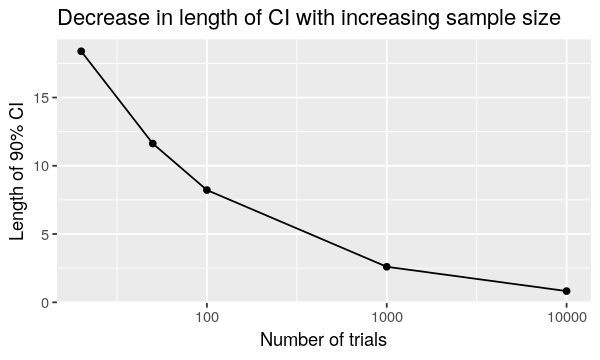

In [24]:
qplot(cm[,1], cm[,3], data=cm, xlab="Number of trials", ylab="Length of 90% CI", main="Decrease in length of CI with increasing sample size", log="x", geom=c("point", "line"))

### Exercise
* Using simulation find the area under a normal curve between the limits $\mu \pm \sigma$
* Assume a uniform distribution between [-5,5]; i.e. X $\sim$ U[-5,5].   
Take 100 samples from this distribution each of sample size 50.  
Plot the histogram of the distribution of the sample means

## An example of Regression using R

In [25]:
dir <- '~/Work/PredictiveAnalytics/PredictiveAnalytics/WJankData/'
g <- read.csv(paste(dir,'GenderDiscrimination.csv',sep=''),header=T)
g[sample(1:dim(g)[1],6,replace=F),]
summary(g)

,Gender,Experience,Salary
151,Male,15,62400
137,Female,14,123600
50,Female,4,57200
115,Female,10,80520
88,Female,12,91600
109,Female,14,79400


    Gender      Experience        Salary      
 Female:140   Min.   : 2.00   Min.   : 53400  
 Male  : 68   1st Qu.: 7.00   1st Qu.: 66000  
              Median :10.00   Median : 74000  
              Mean   :12.05   Mean   : 79844  
              3rd Qu.:16.00   3rd Qu.: 88000  
              Max.   :39.00   Max.   :194000  

Let us see how Salary relates to Experience.

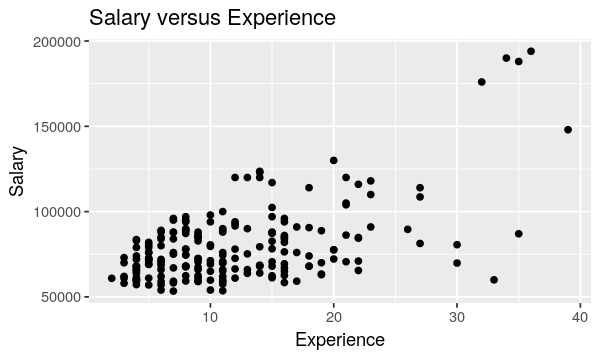

In [26]:
qplot(Experience, Salary, data=g, main="Salary versus Experience")

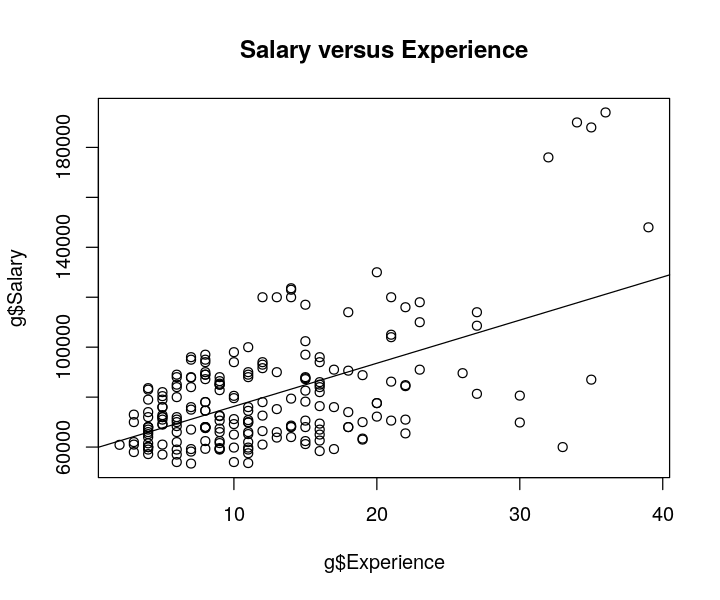

In [27]:
options(repr.plot.width=6, repr.plot.height=5)
plot(g$Experience,g$Salary, main="Salary versus Experience")
l1 <- lm(Salary ~ Experience, data=g)
abline(l1)

---
### Diversion into GGPlot

In a later session (tomorrow), we will be going into depth of the plotting package called `ggplot`. We have already had a taste of the package while using the `qplot` command. However it is a wrapper on the more powerful `ggplot` command, and barely scratches the surface. Here I will give you a taste of what is to come. The previous graph cannot easily be reproduced using the `qplot` command. However, we can replicate it using `ggplot` in two ways.

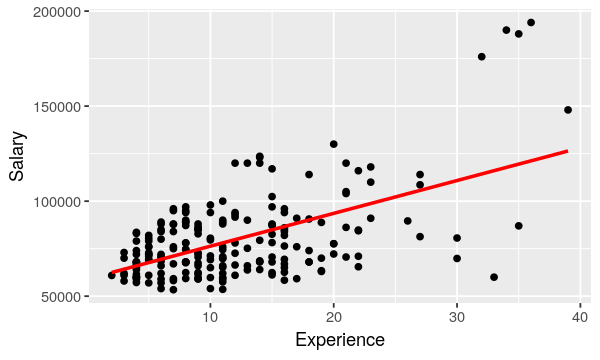

In [28]:
options(repr.plot.width=5, repr.plot.height=3)
graph_data = data.frame(Experience=g$Experience, Salary=g$Salary, Fit=l1$fitted.values)
#head(graph_data)
ggplot(graph_data) + geom_point(aes(x=Experience, y=Salary)) + geom_line(aes(x=Experience, y=Fit), color="Red", size=1)

The first way, shown above, closely replicates the method followed by base-R plot. If we want a quick check, and are not yet interested in the exact fit parameters, `ggplot` offers a second, simpler alternative to the above, using `smooth`ing operations.

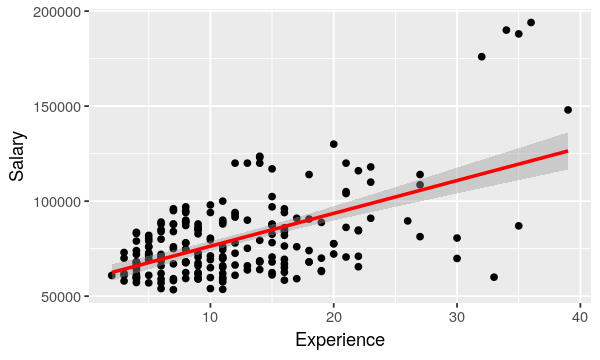

In [29]:
ggplot(g, aes(x=Experience, y=Salary)) + geom_point() + geom_smooth(method='lm', size=1, color='Red', level=0.95)

---

In [30]:
names(summary(l1))
l1$coefficients
summary(l1)$r.squared
summary(l1)$coefficients
#anova(l1)
#anova(l1)$'Pr(>F)'[1]
#ls <- summary(l1)$fstatistic
#pf(ls[1],ls[2],ls[3],lower.tail=F)

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

(Intercept)  Experience 
  59033.075    1727.311

[1] 0.3149884

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),59033.075,2499.8476,23.614670,1.592315e-60
Experience,1727.311,177.4755,9.732669,1.168931e-18


### Salary modeled on Experience; different slopes for the 2 sexes

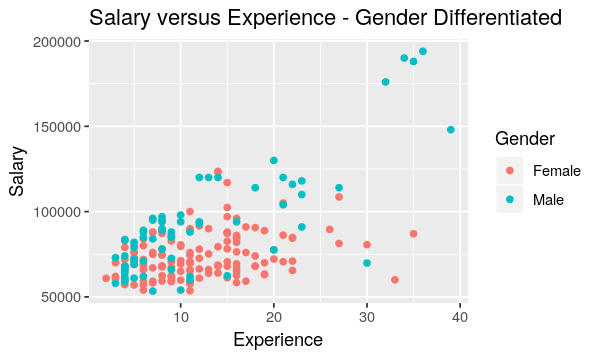

In [31]:
qplot(Experience, Salary, data=g, geom='point', color=Gender, main="Salary versus Experience - Gender Differentiated")

In [32]:
g <- cbind(g,Female=ifelse(as.numeric(g$Gender)==1,1,0))
l2 <- lm(Salary ~ Experience + Experience*Female + Female, data=g)
summary(l2)


Call:
lm(formula = Salary ~ Experience + Experience * Female + Female, 
    data = g)

Residuals:
   Min     1Q Median     3Q    Max 
-71048  -9278  -1701   9166  47932 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        58299.3     2998.6  19.442  < 2e-16 ***
Experience          2753.0      199.8  13.781  < 2e-16 ***
Female              8034.3     4110.6   1.955    0.052 .  
Experience:Female  -2086.2      287.3  -7.261 7.95e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15110 on 204 degrees of freedom
Multiple R-squared:  0.5561,	Adjusted R-squared:  0.5495 
F-statistic: 85.18 on 3 and 204 DF,  p-value: < 2.2e-16



Call:
lm(formula = Salary ~ Experience + Experience * Female + Female, 
    data = g)

Residuals:
   Min     1Q Median     3Q    Max 
-71048  -9278  -1701   9166  47932 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        58299.3     2998.6  19.442  < 2e-16 ***
Experience          2753.0      199.8  13.781  < 2e-16 ***
Female              8034.3     4110.6   1.955    0.052 .  
Experience:Female  -2086.2      287.3  -7.261 7.95e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15110 on 204 degrees of freedom
Multiple R-squared:  0.5561,	Adjusted R-squared:  0.5495 
F-statistic: 85.18 on 3 and 204 DF,  p-value: < 2.2e-16


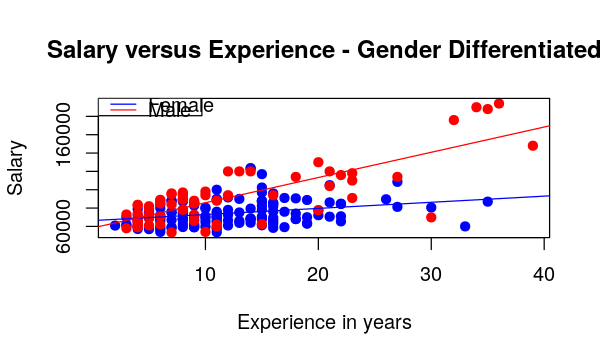

In [33]:
plot(g$Experience,g$Salary, col=ifelse(as.numeric(g$Gender)==1,"blue","red"), 
     #pch=ifelse(as.numeric(g$Gender)==1,1,19), 
     pch=19,
     main="Salary versus Experience - Gender Differentiated",xlab="Experience in years",ylab="Salary")
legend("topleft", c("Female", "Male"), col=c("blue", "red"),lty=1)
summary(l2)
abline(l2$coefficients[1]+l2$coefficients[3],l2$coefficients[2]+l2$coefficients[4],col="blue")
abline(l2$coefficients[1],l2$coefficients[2],col="red")

The Gender-differentiated regression equations for Salary are
* (Females)    66333.6 +  666.8   Experience
* (Males)         58299.3 + 2753.0   Experience

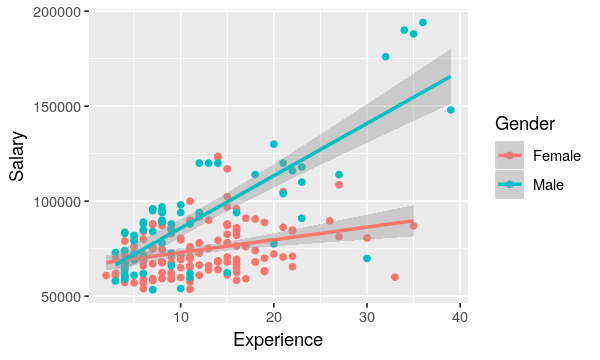

In [34]:
ggplot(g, aes(x=Experience, y=Salary, color=Gender)) + geom_point() + geom_smooth(method='lm')